In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [28]:
income_data = pd.read_csv("historical_income.csv")
income = pd.DataFrame(income_data)
income.head()
income["Per Capita Adjusted for 2017 USD"] = income["Per Capita Adjusted for 2017 USD"].str.replace(",", "")


income["Per Capital Adjusted for 2017 USD"] = pd.to_numeric(income["Per Capita Adjusted for 2017 USD"])
income.style.format({
    "Per Capital Adjusted for 2017 USD": "${:.2}".format})
income1 = income[:19]



In [29]:
labor_data = pd.read_csv("labor_stats.csv")
labor_data["Annual"] = labor_data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]].mean(axis=1)
labor2 = labor_data.drop(labor_data.index[:19])
Mar = labor_data["Mar"]
Jun = labor_data["Jun"]
Sep = labor_data["Sep"]
Dec = labor_data["Dec"]
Avg = labor_data["Annual"]
Mar1 = Mar[19:]
Jun1 = Jun[19:]
Sep1 = Sep[19:]
Dec1 = Dec[19:]

labor2
unemp = list(zip(Mar1, Jun1, Sep1, Dec1))
unemp1 = pd.Series(unemp).values
unemp2 = np.concatenate(unemp1)
unemp2

array([4.2, 4.3, 4.2, 4. , 4. , 4. , 3.9, 3.9, 4.3, 4.5, 5. , 5.7, 5.7,
       5.8, 5.7, 6. , 5.9, 6.3, 6.1, 5.7, 5.8, 5.6, 5.4, 5.4, 5.2, 5. ,
       5. , 4.9, 4.7, 4.6, 4.5, 4.4, 4.4, 4.6, 4.7, 5. , 5.1, 5.6, 6.1,
       7.3, 8.7, 9.5, 9.8, 9.9, 9.9, 9.4, 9.5, 9.3, 9. , 9.1, 9. , 8.5,
       8.2, 8.2, 7.8, 7.9, 7.5, 7.5, 7.2, 6.7, 6.7, 6.1, 5.9, 5.6, 5.4,
       5.3, 5. , 5. , 5. , 4.9, 5. , 4.7, 4.4, 4.3, 4.2, 4.1, 4. , 4. ,
       3.7, 3.9])

In [30]:
education_data = pd.read_csv("education_vs_income.csv", skiprows = 4)
education_data.rename(columns = {
    "Unnamed: 3": "Median Income in 2017 USD",
    "Unnamed: 5": "Mean Income in 2017 USD"}, inplace=True)

education_data["Educational Attainment"] = ""
education_data.iloc[1:32, education_data.columns.get_loc("Educational Attainment")] = "Total"
education_data.iloc[32:60, education_data.columns.get_loc("Educational Attainment")] = "9th Grade"
education_data.iloc[63:91, education_data.columns.get_loc("Educational Attainment")] = "High School No Diploma"
education_data.iloc[94:122, education_data.columns.get_loc("Educational Attainment")] = "GED or HS Diploma"
education_data.iloc[125:153, education_data.columns.get_loc("Educational Attainment")] = "Some College"
education_data.iloc[156:184, education_data.columns.get_loc("Educational Attainment")] = "Associate Degree"
education_data.iloc[187:215, education_data.columns.get_loc("Educational Attainment")] = "Bachelor's Degree or More"
education_data.iloc[218:246, education_data.columns.get_loc("Educational Attainment")] = "Bachelor's Degree"
education_data.iloc[249:277, education_data.columns.get_loc("Educational Attainment")] = "Master's Degree"
education_data.iloc[280:308, education_data.columns.get_loc("Educational Attainment")] = "Professional Degree"
education_data.iloc[311:339, education_data.columns.get_loc("Educational Attainment")] = "Doctorate Degree"

edu_data = education_data.dropna(axis=0, how="any")
edu_csv = open("Education_Data_Cleaned.csv", "w")
csv.writer(edu_csv)
edu_data.to_csv("Education_Data_Cleaned.csv")
edu_data.keys()
edu_data.head()

,Educational attainment and income year,Number (thousand),Median income,Median Income in 2017 USD,Mean income,Mean Income in 2017 USD,Educational Attainment
1,2017,"121,375","62,625","62,625","87,734","87,734",Total
2,2016,"119,985","60,523","61,825","84,538","86,356",Total
3,2015,"119,457","58,044","60,057","80,837","83,640",Total
4,2014,"118,217","55,283","57,299","77,297","80,115",Total
5,2013 (39),"117,279","55,407","58,400","76,898","81,052",Total


In [31]:
mort_csv = open("tieredaffordability_mortgage.csv")
mort_df = (pd.read_csv(mort_csv))

mort_df1 = mort_df.drop(mort_df.index[3:])
mort_df1
#mort_df1 = mort_df1.T
#mort_df1.drop(mort_df1.index[:3])
#mort_df1
#mort_csv = open("Mort_Data_Cleaned.csv", "w")
#csv.writer(mort_csv)
#mort_df1.to_csv("Mort_Data_Cleaned.csv")
#mort_df1.head()


,RegionID,RegionName,PopRank,tier,1999-06-30,1999-09-30,1999-12-31,2000-03-31,2000-06-30,2000-09-30,...,2015-03-31,2015-06-30,2015-09-30,2015-12-31,2016-03-31,2016-06-30,2016-09-30,2016-12-31,2017-03-31,2017-06-30
0,102001,United States,0,Bottom Tier,0.303985,0.316021,0.323100,0.337265,0.341345,0.331888,...,0.198006,0.205808,0.205446,0.210353,0.206243,0.207603,0.209890,0.235805,0.241146,0.238614
1,102001,United States,0,Middle Tier,0.185879,0.193666,0.200559,0.210686,0.213967,0.207215,...,0.140809,0.145112,0.144375,0.146110,0.142303,0.141536,0.141410,0.156327,0.157769,0.153850
2,102001,United States,0,Upper Tier,0.152307,0.158555,0.162713,0.170843,0.173628,0.168954,...,0.112647,0.116110,0.116479,0.119109,0.116787,0.116844,0.117129,0.130298,0.132079,0.129346


In [32]:
mort_csv = open("mort_data_cleaned1.csv")
mort_df2 = (pd.read_csv(mort_csv))
mort_df2["Unemployment"] = [4.2, 4.3, 4.2, 4. , 4. , 4. , 3.9, 3.9, 4.3, 4.5, 5. , 5.7, 5.7,
       5.8, 5.7, 6. , 5.9, 6.3, 6.1, 5.7, 5.8, 5.6, 5.4, 5.4, 5.2, 5. ,
       5. , 4.9, 4.7, 4.6, 4.5, 4.4, 4.4, 4.6, 4.7, 5. , 5.1, 5.6, 6.1,
       7.3, 8.7, 9.5, 9.8, 9.9, 9.9, 9.4, 9.5, 9.3, 9. , 9.1, 9. , 8.5,
       8.2, 8.2, 7.8, 7.9, 7.5, 7.5, 7.2, 6.7, 6.7, 6.1, 5.9, 5.6, 5.4,
       5.3, 5. , 5. , 5. , 4.9, 5. , 4.7, 4.4, 4.3, 4.2, 4.1, 4. , 4. ,
       3.7]
mort_df3 = mort_df2.drop(mort_df2.index[-6:])
#mort_df4 = mort_df3[mort_df3.tier != '6/']
#mort_df3[mort_df3.tier != '3/']

mort_df4 = mort_df3[::4]

mort_df4[["Upper Tier", "Middle Tier", "Bottom Tier", "Unemployment"]] = mort_df4[["Upper Tier", "Middle Tier", "Bottom Tier", "Unemployment"]].apply(pd.to_numeric)

mort_df4["Unemployment"] = mort_df4["Unemployment"].div(100)
mort_df4.style.format({
    "Unemployment": "{:.2%}".format,
    "Upper Tier": "{:.2%}".format,
    "Middle Tier": "{:.2%}".format,
    "Bottom Tier": "{:.2%}".format})
mort_df4["tier"] = pd.to_datetime(mort_df4["tier"])
mort_df4.dtypes

c:\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python37\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


tier            datetime64[ns]
Bottom Tier            float64
Middle Tier            float64
Upper Tier             float64
Unemployment           float64
dtype: object

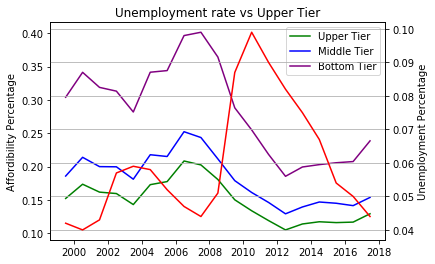

In [33]:
rate = mort_df4["Unemployment"]
date = mort_df4["tier"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, mort_df4["Upper Tier"], "g-")
ax1.plot(date, mort_df4["Middle Tier"], "b-")
ax1.plot(date, mort_df4["Bottom Tier"], "purple")
ax2.plot(date, mort_df4["Unemployment"], "r-")
plt.title("Unemployment rate vs Upper Tier")
plt.xlabel("Unemployment Rate")
ax1.set_ylabel("Affordibility Percentage")
ax2.set_ylabel("Unemployment Percentage")
plt.grid()
ax1.legend()

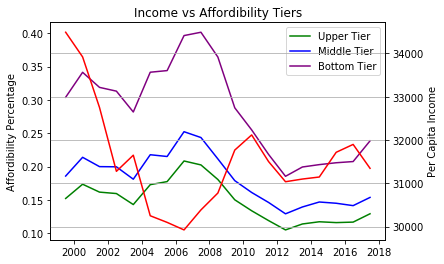

In [34]:
per_capita = income1["Per Capital Adjusted for 2017 USD"]
date = mort_df4["tier"]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(date, mort_df4["Upper Tier"], "g-")
ax1.plot(date, mort_df4["Middle Tier"], "b-")
ax1.plot(date, mort_df4["Bottom Tier"], "purple")
ax2.plot(date, per_capita, "r-")
plt.title("Income vs Affordibility Tiers")
plt.xlabel("Unemployment Rate")
ax1.set_ylabel("Affordibility Percentage")
ax2.set_ylabel("Per Capita Income")
plt.grid()
ax1.legend()

In [35]:
mort_df5 = mort_df1[["2016-03-31", "2016-06-30", "2016-09-30", "2016-12-31"]]
mort_df5 = mort_df5.T
mort_df5.columns = ["Upper", "Middle", "Bottom"]
mort_df5

,Upper,Middle,Bottom
2016-03-31,0.206243,0.142303,0.116787
2016-06-30,0.207603,0.141536,0.116844
2016-09-30,0.209890,0.141410,0.117129
2016-12-31,0.235805,0.156327,0.130298


In [36]:
total = edu_data.iloc[[28, 56, 84, 112, 140, 168, 196, 224, 252, 280]]

total["Tier"]=""
total

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Educational attainment and income year,Number (thousand),Median income,Median Income in 2017 USD,Mean income,Mean Income in 2017 USD,Educational Attainment,Tier
32,2017,"4,094","26,587","26,587","38,637","38,637",9th Grade,
63,2017,"7,467","30,100","30,100","43,155","43,155",High School No Diploma,
94,2017,"32,111","44,970","44,970","60,305","60,305",GED or HS Diploma,
125,2017,"21,162","55,563","55,563","73,360","73,360",Some College,
156,2017,"12,868","64,263","64,263","81,335","81,335",Associate Degree,
187,2017,"43,673","100,021","100,021","128,976","128,976",Bachelor's Degree or More,
218,2017,"26,727","91,772","91,772","115,916","115,916",Bachelor's Degree,
249,2017,"12,545","108,231","108,231","137,168","137,168",Master's Degree,
280,2017,"1,744","139,069","139,069","194,767","194,767",Professional Degree,
311,2017,"2,657","140,110","140,110","178,468","178,468",Doctorate Degree,


In [37]:

total["Median Income in 2017 USD"] = total["Median Income in 2017 USD"].astype(str).str.replace("\n", "")
med_income = total["Median Income in 2017 USD"]
repr(med_income)

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


'32      26,587\n63      30,100\n94      44,970\n125     55,563\n156     64,263\n187    100,021\n218     91,772\n249    108,231\n280    139,069\n311    140,110\nName: Median Income in 2017 USD, dtype: object'

In [38]:
tier = []
total["Median Income in 2017 USD"] = total["Median Income in 2017 USD"].astype(str).str.replace(",", "")

total["Median Income in 2017 USD"] = total["Median Income in 2017 USD"].apply(pd.to_numeric)
med_income = total["Median Income in 2017 USD"]

for x in med_income: 
    if x < 39999:
        tier.append("Bottom")
    if x <= 118000 and x >= 40000:
        tier.append("Middle")
    if x > 118000:
        tier.append("Upper")
total["Tier"] = tier
total

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python37\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

,Educational attainment and income year,Number (thousand),Median income,Median Income in 2017 USD,Mean income,Mean Income in 2017 USD,Educational Attainment,Tier
32,2017,"4,094","26,587",26587,"38,637","38,637",9th Grade,Bottom
63,2017,"7,467","30,100",30100,"43,155","43,155",High School No Diploma,Bottom
94,2017,"32,111","44,970",44970,"60,305","60,305",GED or HS Diploma,Middle
125,2017,"21,162","55,563",55563,"73,360","73,360",Some College,Middle
156,2017,"12,868","64,263",64263,"81,335","81,335",Associate Degree,Middle
187,2017,"43,673","100,021",100021,"128,976","128,976",Bachelor's Degree or More,Middle
218,2017,"26,727","91,772",91772,"115,916","115,916",Bachelor's Degree,Middle
249,2017,"12,545","108,231",108231,"137,168","137,168",Master's Degree,Middle
280,2017,"1,744","139,069",139069,"194,767","194,767",Professional Degree,Upper
311,2017,"2,657","140,110",140110,"178,468","178,468",Doctorate Degree,Upper


In [39]:
bottom, middle, upper

([], [], [])

[Text(0, 0, '>9th'),
 Text(0, 0, '9th-12th'),
 Text(0, 0, 'GED or Diploma'),
 Text(0, 0, 'Some Coll'),
 Text(0, 0, 'Associate'),
 Text(0, 0, 'Bachelors or More'),
 Text(0, 0, 'Bachelors'),
 Text(0, 0, 'Masters'),
 Text(0, 0, 'Professional Degree'),
 Text(0, 0, 'Doctorate')]

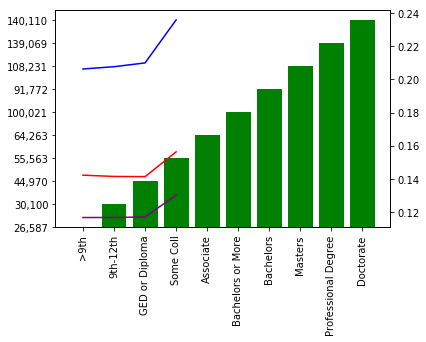

In [42]:
x_axis = np.arange(len(total["Median income"])) 
data = total["Median income"]
labels = [">9th", "9th-12th", "GED or Diploma", "Some Coll", "Associate", "Bachelors or More", "Bachelors", "Masters", "Professional Degree", "Doctorate"]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()




ax1.bar(x_axis, data, color="g", align='center')
ax2.plot(np.arange(len(mort_df5["Upper"])), mort_df5["Upper"], "b-")
ax2.plot(np.arange(len(mort_df5["Middle"])), mort_df5["Middle"], "r-")
ax2.plot(np.arange(len(mort_df5["Bottom"])), mort_df5["Bottom"], "purple")
ax1.set_xticks(x_axis)
ax1.set_xticklabels(labels, rotation=90)
